# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="100px" />
 </div>

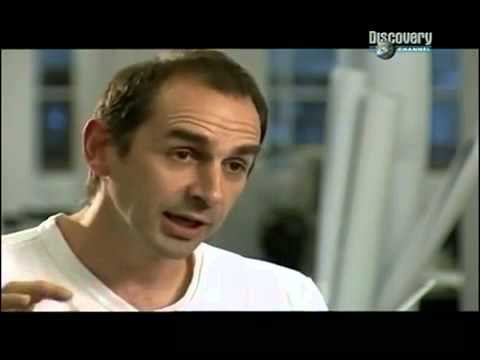

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="210px" height="70px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def pos(t,w0):
    A=1
    B=1
    return A*np.cos(w0*t)+B*np.sin(w0*t)
def vel(t,w0):
    A=1
    B=1
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))

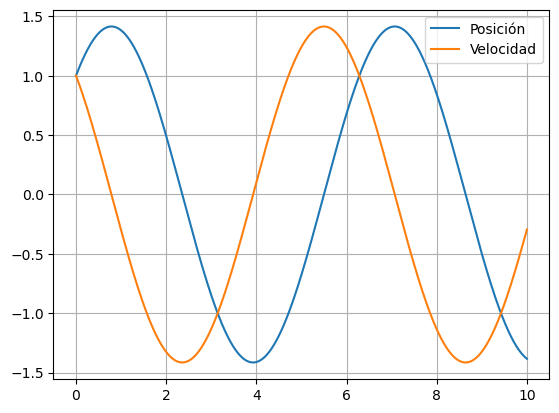

In [31]:
w0=1
t=np.linspace(0,10,1000)
plt.plot(t,pos(t,w0),label='Posición')
plt.plot(t,vel(t,w0),label='Velocidad')
plt.legend()
plt.grid()

In [5]:
# plt.legend?

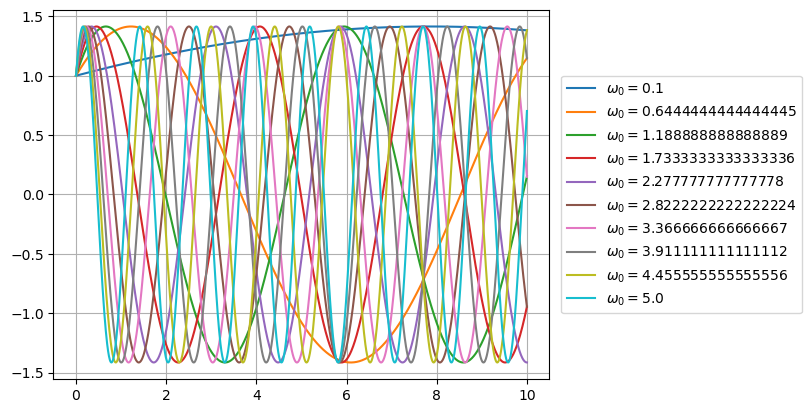

In [6]:
W=np.linspace(0.1,5,10)
for w0 in W:
    plt.plot(t,pos(t,w0),label='$\omega_0={}$'.format(w0))
plt.legend(bbox_to_anchor=(1.01,0.5),loc='center left')
'''
===============   =============
Location String   Location Code
===============   =============
'best'            0
'upper right'     1
'upper left'      2
'lower left'      3
'lower right'     4
'right'           5
'center left'     6
'center right'    7
'lower center'    8
'upper center'    9
'center'          10
===============   =============
'''
plt.grid()

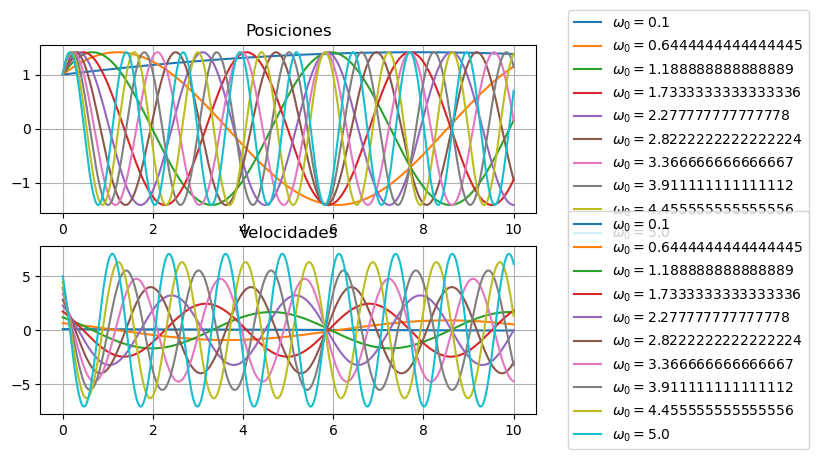

In [7]:
# Subplots
# 
fig=plt.figure() # Definimos una variable de tipo figura
ax=fig.add_subplot(2,1,1) # (No_filas, No_columnas, eje_actual) -> Se pueden omitir las comas: (211)
ax.set_title('Posiciones')
for w0 in W:
    ax.plot(t,pos(t,w0),label='$\omega_0={}$'.format(w0))
ax.legend(bbox_to_anchor=(1.05,0.5),loc=6)
ax.grid()

ax=fig.add_subplot(212)
ax.set_title('Velocidades')
for  w0 in W:
    ax.plot(t,vel(t,w0),label='$\omega_0={}$'.format(w0))
ax.legend(bbox_to_anchor=(1.05,0.5),loc=6)
ax.grid()

In [8]:
# gs?

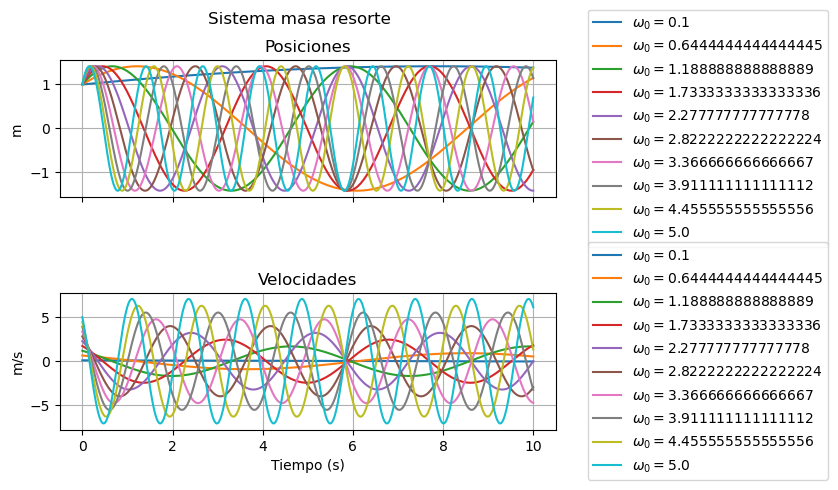

In [9]:
# Con gridspecs
fig=plt.figure()
gs=fig.add_gridspec(2,1,hspace=0.7) # No_filas, No_columnas
ax=gs.subplots()

fig.suptitle('Sistema masa resorte')

for w0 in W:
    # Posiciones
    ax[0].plot(t,pos(t,w0),label='$\omega_0={}$'.format(w0))
    # Velocidades
    ax[1].plot(t,vel(t,w0),label='$\omega_0={}$'.format(w0))
ax[0].set(title='Posiciones',ylabel='m')
ax[1].set(title='Velocidades',xlabel='Tiempo (s)',ylabel='m/s')

for eje in ax:
    eje.legend(bbox_to_anchor=(1.05,0.5),loc=6)
    eje.grid()
    eje.label_outer() # Para mostrar unicamente los ejes exteriores

**Plano de fase**

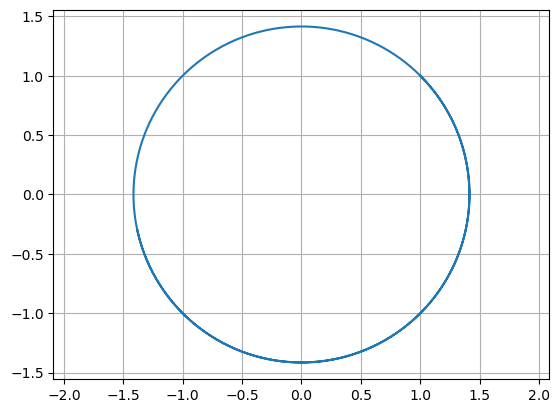

In [10]:
w0=1
plt.plot(pos(t,w0),vel(t,w0))
plt.axis('equal')
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

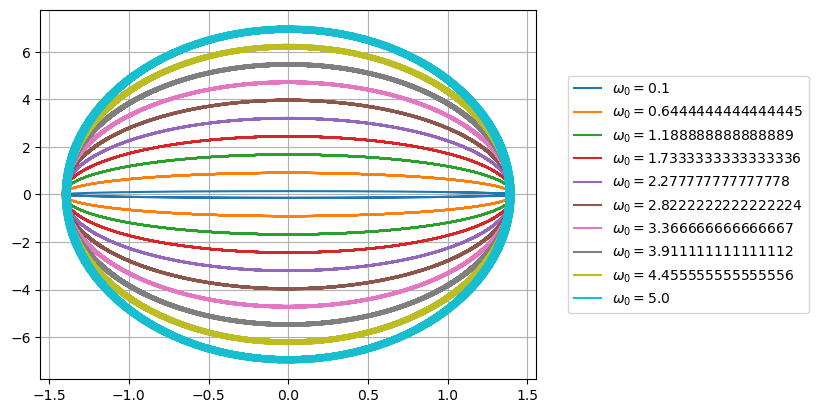

In [11]:
t=np.linspace(0,100,1000)
for w0 in W:
    plt.plot(pos(t,w0),vel(t,w0),label='$\omega_0={}$'.format(w0))
plt.legend(bbox_to_anchor=(1.05,0.5), loc=6)
# plt.axis('equal')
plt.grid()

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo
La posición y velocidad para el sistema `masa-resorte` se escriben como: 
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

Importemos la clase `interact` e `interact_manual`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

In [13]:
#interact?

In [14]:
def pos(t,x0,v0,w0):
    return x0*np.cos(w0*t)+v0/w0*np.sin(w0*t)
def vel(t,x0,v0,w0):
    return -w0*x0*np.sin(w0*t)+v0*np.cos(w0*t)

In [15]:
# Usando 'interact' como función
# 
def plano_fase(v0,w0,x0=1):
    t=np.linspace(0,100,1000)
    plt.plot(pos(t,x0,v0,w0),vel(t,x0,v0,w0))
    plt.xlabel('Posición (m)')
    plt.ylabel('Velocidad (m/s)')
    plt.axis([-2,2,-2,2]) # [min_x, max_x, min_y, max_y]
    plt.grid()
interact(plano_fase,x0=(-2,2,0.1),v0=(-0.1,0.1,0.01),w0=(0.1,1,0.1)) # Argumentos=(valor_minimo, valor_maximo, paso_modificacion)

interactive(children=(FloatSlider(value=0.0, description='v0', max=0.1, min=-0.1, step=0.01), FloatSlider(valu…

<function __main__.plano_fase(v0, w0, x0=1)>

In [16]:
interact(plano_fase,x0=(-2,2,0.1),v0=fixed(0),w0=(0.1,1,0.1))

interactive(children=(FloatSlider(value=0.5, description='w0', max=1.0, min=0.1), FloatSlider(value=1.0, descr…

<function __main__.plano_fase(v0, w0, x0=1)>

**Actividad:** Crear un gráfico interactivo para variar la velocidad inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

In [17]:
interact(plano_fase,x0=fixed(1),v0=(-0.1,0.1,0.001),w0=(0.1,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='v0', max=0.1, min=-0.1, step=0.001), FloatSlider(val…

<function __main__.plano_fase(v0, w0, x0=1)>

In [18]:
# Usando 'interact_manual' como Decorador
# 
@interact_manual(x0=(-2,2,0.1),v0=fixed(0),w0=(0.1,1,0.1))
def plano_fase(v0,w0,x0=1):
    t=np.linspace(0,100,1000)
    plt.plot(pos(t,x0,v0,w0),vel(t,x0,v0,w0))
    plt.xlabel('Posición (m)')
    plt.ylabel('Velocidad (m/s)')
    plt.axis([-2,2,-2,2]) # [min_x, max_x, min_y, max_y]
    plt.grid()

interactive(children=(FloatSlider(value=0.5, description='w0', max=1.0, min=0.1), FloatSlider(value=1.0, descr…

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def pos(t,x0,v0,w0):
    return x0*np.cos(w0*t)+v0/w0*np.sin(w0*t)

In [2]:
from matplotlib.animation import FuncAnimation

In [21]:
# FuncAnimation?

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t).
\end{align}

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

<IPython.core.display.Javascript object>


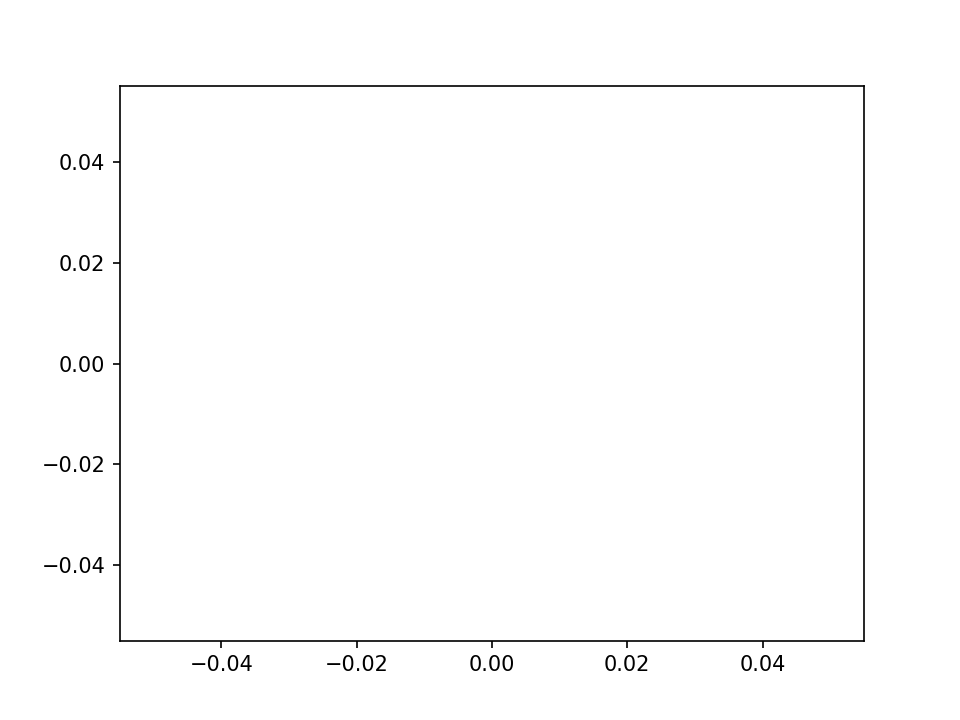

In [5]:
# Obtención de 'iterable_artist'
line,=plt.plot([],[]) # la coma la usamos para extraer el elemnto dentro del arreglo
line # Este es el elemento 'iterable_artist'

In [11]:
#matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


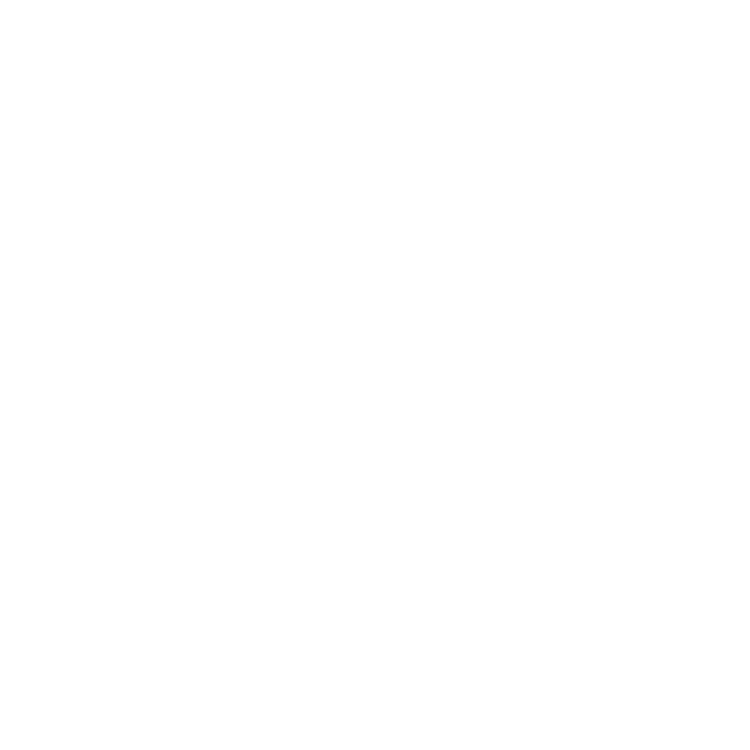

In [6]:
def pendulo(t,th0,v0,L):
    g=9.81              # aceleración por interacción gravitatoria
    w0=np.sqrt(g/L)     # frecuencia natural
    th=pos(t,th0,v0,w0) # Solución de la posición angular
    # Convertimos a coordenadas cartecianas
    x=L*np.sin(th)
    y=-L*np.cos(th)
    # Gráfico
    plt.cla() # Limpiamos los ejes
    lines=plt.plot([-L,L],[0,0],'k',[0,x],[0,y],'b',x,y,'ob',ms=10)
    plt.axis([-L,L,-1.5*L,0.5*L])
    return lines
fig=plt.figure(figsize=(5,5))
t=np.linspace(0,20,200)
FuncAnimation(fig,pendulo,t,fargs=(0.2,0,1),interval=100,repeat=False)

In [6]:
%matplotlib inline

Animación del sitema masa-resorte

In [34]:
# Definimos dimensiones
# 
L=0.5  # Lado del cuadrado de masa 'm'
d=0.01 # Extremos del resorte
l=0.3  # longitud de los muelles del resorte

# Definimos la función que grafique el resorte
def resorte(D,N=0):
    # Arreglos iniciales
    x=[0,d]
    y=[0,0]
    
    # Incrementos
    xi=(D-2*d)/(4*N+1)
    yi=np.sqrt(0.25*l**2-xi**2)
    
    x.append(d+xi)
    y.append(-yi)
    
    i=-1
    for k in range(2*N+1):
        x.append(x[-1]+2*xi)
        i *= -1              # i=i*(-1)
        y.append(i*yi)
        
    x.append(x[-1]+xi)
    y.append(0)
    x.append(x[-1]+d)
    y.append(0)
    return x,y
x,y=resorte(0.03)

<IPython.core.display.Javascript object>


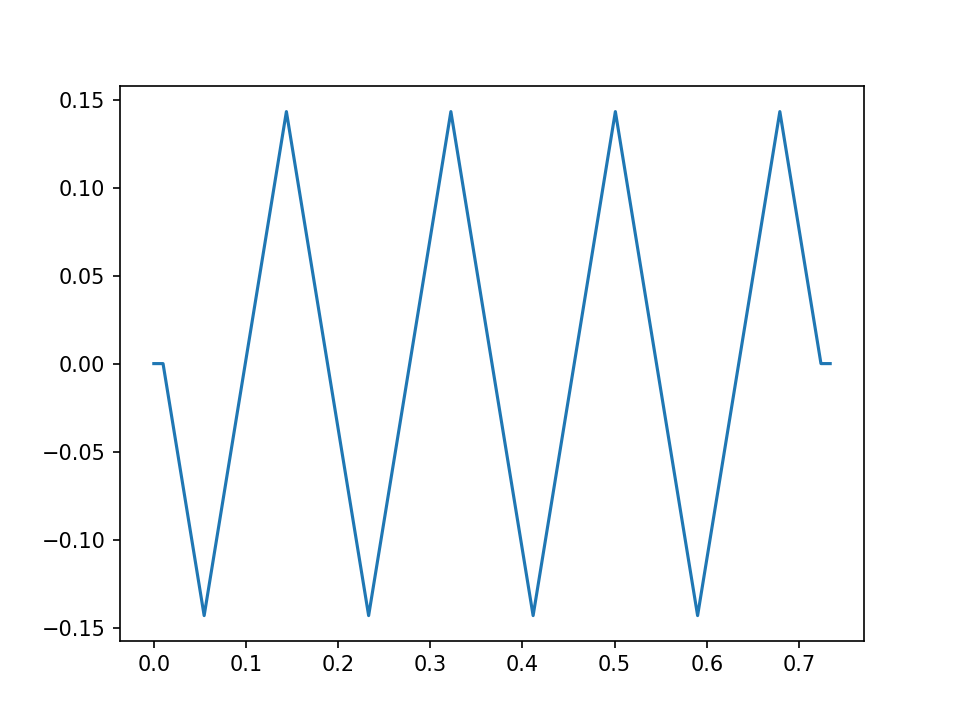

In [35]:
x,y=resorte(0.5+0.1,3)
plt.plot(x,y)

<IPython.core.display.Javascript object>


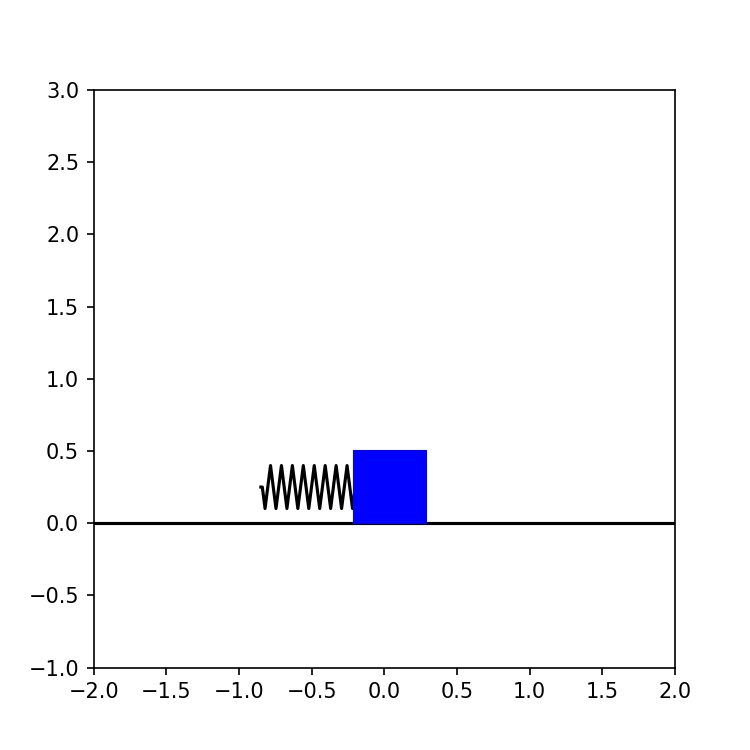

In [36]:
# Función para la animación
#
def masa_resorte(t,x0,v0,K,m):
    w0=np.sqrt(K/m)
    x=pos(t,x0,v0,w0)
    plt.cla()  # Limpiamos la imagen
    
    xr,yr=resorte(x+0.6,8)
    lines=plt.plot(np.array(xr)-0.5*L-0.6,np.array(yr)+0.5*L,'k', # Resorte
                   [-2,2],[0,0],'k',          # Piso
                   x,0.5*L,'sb',ms=35)        # Bloque
    plt.axis([-2,2,-1,3])
    return lines
fig=plt.figure(figsize=(5,5))
t=np.linspace(0,20,200)
FuncAnimation(fig,masa_resorte,t,fargs=(0.1,0,1,1),interval=100,repeat=False)